# Volume 4: The Shooting Method for BVPs
    Benj McMullin
    Math 439
    2/6/2024

In [12]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

In [13]:
def secant_method(h, s0, s1, max_iter=100, tol=1e-8):
    """
    Finds a root of h(s)=0 using the secant method with the
    initial guesses s0, s1.
    """
    for i in range(max_iter):
        # Get the residuals
        h0 = h(s0)
        h1 = h(s1)
        # Update
        s2 = s1 - h1 * (s1 - s0)/(h1 - h0)
        s0, s1 = s1, s2
        
        # Check convergence
        if abs(h1) < tol:
            return s2
    
    print("Secant method did not converge")
    return s2

# Problem 1

Appropriately defined initial value problems will usually have a unique solution.
Boundary value problems are not so straightforward; they may have no solution or they may have several, and you may have to determine which solutions are physically interesting.

Use the secant method to solve the following BVP:
\begin{equation*}
\begin{split}
y'' &= -e^{y-1}, \quad x \in [0,1],\\
y(0) &=y(1) =1.
\end{split}
\end{equation*}
This BVP has two solutions.
Using the secant method, find both numerical solutions and their initial slopes.
What initial values $s_0, s_1$ did you use to find them?

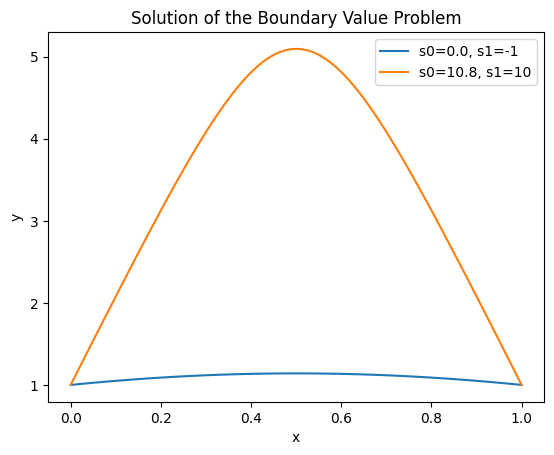

In [14]:
# Define the ordinary differential equation (ODE)
def ode(x, y):
    """
    Define the system of ordinary differential equations (ODE).
    
    Parameters:
        x (float): The independent variable.
        y (ndarray): Array containing the dependent variables.
        
    Returns:
        ndarray: Array containing the derivatives of the dependent variables.
    """
    return np.array([y[1], -np.exp(y[0] - 1)])

# Define the boundary value problem (BVP) parameters
a = 0     # Left boundary
b = 1     # Right boundary
alpha = 1 # Left boundary condition
beta = 1  # Right boundary condition

# Define the residual function for the secant method
def residual(s):
    """
    Compute the residual function for the secant method.
    
    Parameters:
        s (float): Initial guess for the second boundary condition.
        
    Returns:
        float: Residual value based on the difference between the computed and target boundary conditions.
    """
    # Solve the initial value problem (IVP) using the given boundary conditions
    sol = solve_ivp(ode, (a, b), [alpha, s])
    # Compute the value of the dependent variable at the right boundary
    yb = sol.y[0, -1]
    # Compute the residual based on the difference between the computed and target boundary conditions
    return yb - beta

# Call the secant method to find the second boundary condition
s = secant_method(residual, (beta - alpha) / 2, -1)

# Compute and plot the solution for the first set of initial guesses
x = np.linspace(a, b, 100)
y = solve_ivp(ode, (a, b), (alpha, s), t_eval=x).y[0]
plt.plot(x, y, label=f"s0={(beta - alpha) / 2}, s1=-1")

# Call the secant method again with different initial guesses
s = secant_method(residual, 10.8, 10)
# Compute and plot the solution for the second set of initial guesses
x = np.linspace(a, b, 100)
y = solve_ivp(ode, (a, b), (alpha, s), t_eval=x).y[0]
plt.plot(x, y, label=f"s0=10.8, s1=10")

# Add labels and legend to the plot
plt.legend()
plt.title('Solution of the Boundary Value Problem')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Problem 2

Use Newton's method to solve the BVP
\begin{align*}
y'' &= 3 + \frac{2y}{x^2}, \,\, x \in [1,e],\\
y(1) &= 6, \\
y(e) &= e^2 + 6/e
\end{align*}
Plot your solution.

In [15]:
def newtons_method(h, z, s0, max_iter=100, tol=1e-8):
    """
    Find a root of the function h(s) = 0 using Newton's method with the initial guess s0.
    
    Parameters:
        h (function): The function for which the root is to be found.
        z (function): The derivative of the function h with respect to the variable s.
        s0 (float): Initial guess for the root.
        max_iter (int): Maximum number of iterations (default is 100).
        tol (float): Tolerance for convergence (default is 1e-8).
    
    Returns:
        float: The approximate root of the function h(s).
    """
    for i in range(max_iter):
        # Get the residual of the function at the current guess
        h0 = h(s0)
        
        # Update the guess using Newton's method
        s1 = s0 - h0 / z(s0)
        s0 = s1
        
        # Check for convergence
        if abs(h0) < tol:
            return s1
        
    # Print a message if Newton's method did not converge
    print("Newton's method did not converge")
    return s1


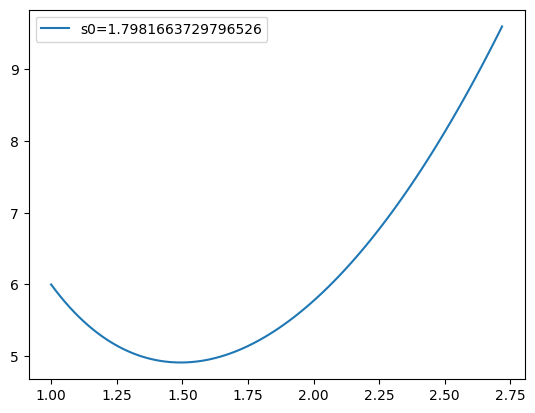

An appropriate initial guess is anywhere on the domain because it is convex.


In [16]:
# Define the ordinary differential equations (ODEs)
def y_ode(x, y):
    """
    Define the ODE for function y(x).
    
    Parameters:
        x (float): Independent variable.
        y (array): Array containing the dependent variables y and its derivative y'.
        
    Returns:
        array: Array containing the derivatives of y and y'.
    """
    return np.array([y[1], 3 + (2 * y[0] / x**2)])

def z_ode(x, y):
    """
    Define the ODE for function z(x).
    
    Parameters:
        x (float): Independent variable.
        y (array): Array containing the dependent variables z and its derivative z'.
        
    Returns:
        array: Array containing the derivatives of z and z'.
    """
    return np.array([y[1], 2 * y[0] / x**2])

# Define the boundaries
a = 1
b = np.exp(1)
alpha = 6
beta = np.exp(2) + 6 / np.exp(1)

# Define the residual function
def residual(s):
    """
    Calculate the residual for Newton's method.
    
    Parameters:
        s (float): Guess for the initial slope.
        
    Returns:
        float: Residual value.
    """
    sol = solve_ivp(y_ode, (a, b), [alpha, s])
    yb = sol.y[0, -1]
    return yb - beta

# Define the derivative of the residual function
def z(s):
    """
    Calculate the derivative of the residual function.
    
    Parameters:
        s (float): Guess for the initial slope.
        
    Returns:
        float: Value of the derivative of the residual function.
    """
    sol = solve_ivp(z_ode, (a, b), [0, 1])
    yb = sol.y[0, -1]
    return yb

# Call Newton's method to find the appropriate initial guess
n = newtons_method(residual, z, (beta - alpha) / 2)

# Solve the ODE with the found initial guess
x = np.linspace(a, b, 100)
y = solve_ivp(y_ode, (a, b), (alpha, n), t_eval=x).y[0]

# Plot the solution
plt.plot(x, y, label=f"s0={(beta - alpha) / 2}")
plt.legend()
plt.show()

# Print a message about the choice of initial guess
print("An appropriate initial guess is anywhere on the domain because it is convex.")


# Problem 3

Suppose we have a cannon that fires a projectile at a velocity of $45\text{ m/s}$, and the projectile has a mass of about $60$ kg, so that $\mu = .0003$.
At what angle $\theta(0)$ should it be fired to land at a distance of $195\text{ m}$?
Use the secant method to find initial values for $\theta$ that give solutions to the following BVP:
\begin{align}
	\begin{split}
\frac{dy}{dx} &= \tan {\theta} ,\\
\frac{dv}{dx} &= -\frac{g \sin{\theta} + \mu v^2}{v \cos{\theta}},\\
\frac{d\theta}{dx} &= -\frac{g}{v^2},\\
y(0)&= y(195) = 0,\\
v(0) &= 45 \text{ m/s}
	\end{split}
\end{align}
($g = 9.8067\text{ m/s}^2$.)

There are four initial angles $\theta(0)$ that produce solutions for this BVP when $\mu = 0.0003$.
Find and plot at least two of them.
Also find the two solutions when $\mu = 0$ (no air resistance), and compare.

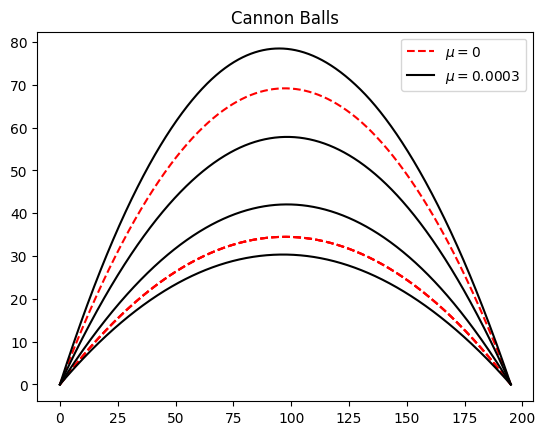

In [17]:
# Initialize the parameters
v0 = 45
m = 60
mu = .0003
a = 0
b = 195
alpha = 0
beta = 0
g = 9.8067

# Define the ordinary differential equation (ODE)
def ode(x, y):
    """
    Define the ODE for the cannonball trajectory.
    
    Parameters:
        x (float): Independent variable (time).
        y (array): Array containing the dependent variables y, v, and theta.
        
    Returns:
        array: Array containing the derivatives of y, v, and theta.
    """
    return np.array([np.tan(y[2]), -(g*np.sin(y[2]) + mu*y[1]**2)/(y[1]*np.cos(y[2])), -g/y[1]**2])

# Define the residual function
def residual(s):
    """
    Calculate the residual for the secant method.
    
    Parameters:
        s (float): Guess for the initial slope.
        
    Returns:
        float: Residual value.
    """
    sol = solve_ivp(ode, (a,b), [alpha,v0,s])
    yb = sol.y[0,-1]
    return yb - beta
    
# Iterate through different values of mu and plot the solutions
for mu in [0,.0003]:

    # Plot various guesses for the initial slope
    s = secant_method(residual, 0,1)
    x = np.linspace(0,195,1000)
    y = solve_ivp(ode, (a,b), (alpha,v0,s), t_eval=x).y[0]
    plt.plot(x,y, "k-" if mu==.0003 else "r--", label=f"$\mu={mu}$")
    
    s = secant_method(residual, (beta-alpha)/2, -1)
    x = np.linspace(0,195,1000)
    y = solve_ivp(ode, (a,b), (alpha,v0,s), t_eval=x).y[0]
    plt.plot(x,y, "k-" if mu==.0003 else "r--")
    
    s = secant_method(residual, 10.8, 10)
    x = np.linspace(0,195,1000)
    y = solve_ivp(ode, (a,b), (alpha,v0,s), t_eval=x).y[0]
    plt.plot(x,y, "k-" if mu==.0003 else "r--")
    
    s = secant_method(residual, 1,6)
    x = np.linspace(0,195,1000)
    y = solve_ivp(ode, (a,b), (alpha,v0,s), t_eval=x).y[0]
    plt.plot(x,y, "k-" if mu==.0003 else "r--")
    
    
plt.title("Cannon Balls")
plt.legend()
plt.show()
